We have the same procedure as the genderclassifier for the data preparation step.

In [201]:
import numpy as np
import pandas as pd
# The following two modules matplotlib and seaborn are for plots
import matplotlib.pyplot as plt
import seaborn as sns # Comment this if seaborn is not installed
%matplotlib inline
# The module re is for regular expressions
import re

In [202]:
def stringToArray(pixels):
    # this converts the string array into a 48x48 numpy array containing the image
    # needed because the datasets converts the pixel array into string form
    pixels = pixels + " "
    pixelArray = np.array([])
    lenPixels = len(pixels)
    i = 0
    num = ""
    while i < lenPixels:
        if pixels[i] != " ":
            num += pixels[i]
        else:
            pixelArray = np.append(pixelArray, [int(num)])
            num = ""
        i += 1

    imageArray = np.reshape(pixelArray,(48,48))
    return imageArray
df = pd.read_csv('age_gender.csv')
df["pixels"] = df["pixels"].map(stringToArray)
df = df.drop("img_name", axis = 1)
df = df.drop("ethnicity", axis = 1)
df.head()


,age,gender,pixels
0,1,0,"[[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 13..."
1,1,0,"[[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175..."
2,1,0,"[[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79..."
3,1,0,"[[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 20..."
4,1,0,"[[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 21..."


We need to create classes of ages, and map the age column using this function

We'll remember the encoding

child: 0

teenager: 1

young adult: 2

adult: 3

elder: 4

In [203]:
def ageGroup(age):
    if 0 <= age and age <= 9:
        return 0
    if 10 <= age and age <= 19:
        return 1
    if 20 <= age and age <= 30:
        return 2
    if 31 <= age and age <= 60:
        return 3
    if 61 <= age:
        return 4


In [204]:
df["age"] = df["age"].map(ageGroup)

In [205]:
df

,age,gender,pixels
0,0,0,"[[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 13..."
1,0,0,"[[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175..."
2,0,0,"[[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79..."
3,0,0,"[[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 20..."
4,0,0,"[[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 21..."
...,...,...,...
23700,4,1,"[[127.0, 100.0, 94.0, 81.0, 77.0, 77.0, 74.0, ..."
23701,4,1,"[[23.0, 28.0, 32.0, 35.0, 42.0, 47.0, 68.0, 85..."
23702,4,1,"[[59.0, 50.0, 37.0, 40.0, 34.0, 19.0, 30.0, 10..."
23703,4,1,"[[45.0, 108.0, 120.0, 156.0, 206.0, 197.0, 140..."


In [206]:
df["age"].value_counts()

3    8649
2    8068
0    3062
4    2395
1    1531
Name: age, dtype: int64

In [207]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
num_classes = 5
# default is 75% / 25% train-test split
X = df['pixels'].values
y = df['age'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)
X_train = X_train.tolist()
X_train = np.asarray(X_train)
X_train = X_train.astype('float32')
X_valid = X_valid.tolist()
X_valid = np.asarray(X_valid)
X_valid = X_valid.astype('float32')



In [208]:
y_train

array([3, 2, 1, ..., 2, 0, 0])

In [209]:
from keras.utils import to_categorical
num_classes = 5
y_train = y_train.tolist()
y_valid = y_valid.tolist()
y_train = to_categorical(y_train, 5)
y_valid = to_categorical(y_valid, 5)


In [210]:
y_train

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [211]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

input_shape = (48,48,1)

# Build and train the CNN
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_shape))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2))) # outputs a matrix with half width and height
model.add(Dropout(0.2)) # Dropout layers prevent overfitting, helping the model generalize

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_29 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_31 (Conv2D)          (None, 24, 24, 64)        36928     
                                                      

In [212]:
batch_size = 32
num_classes = 5
epochs = 30

opt = Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999) # Adam is one good optimizer function; lr is the learning rate

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_valid, y_valid))
score = model.evaluate(X_valid, y_valid, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
556/556 [==============================] - 107s 183ms/step - loss: 2.9461 - accuracy: 0.3651 - val_loss: 0.4679 - val_accuracy: 0.4193
Epoch 2/30
556/556 [==============================] - 101s 181ms/step - loss: 0.4305 - accuracy: 0.4650 - val_loss: 0.3734 - val_accuracy: 0.5423
Epoch 3/30
556/556 [==============================] - 102s 183ms/step - loss: 0.3911 - accuracy: 0.5157 - val_loss: 0.3470 - val_accuracy: 0.5709
Epoch 4/30
556/556 [==============================] - 99s 179ms/step - loss: 0.3627 - accuracy: 0.5566 - val_loss: 0.3224 - val_accuracy: 0.6013
Epoch 5/30
556/556 [==============================] - 97s 175ms/step - loss: 0.3464 - accuracy: 0.5824 - val_loss: 0.3131 - val_accuracy: 0.6288
Epoch 6/30
556/556 [==============================] - 96s 173ms/step - loss: 0.3342 - accuracy: 0.5974 - val_loss: 0.3021 - val_accuracy: 0.6396
Epoch 7/30
556/556 [==============================] - 94s 168ms/step - loss: 0.3239 - accuracy: 0.6111 - val_loss: 0.2937 - val

In [215]:
def prediction(image):
    X_tst = []
    a = np.expand_dims(image, axis = 2)
    X_tst.append(a)
    X_tst = np.asarray(X_tst)
    X_tst = X_tst.astype('float32')
    y = model.predict(X_tst)
    a = max(y[0])
    print(y[0])
    if y[0][0] == a:
        return "child (0-9 years old)"
    elif y[0][1] == a:
        return "teenager (10 to 19 years old)"
    elif y[0][2] == a:
        return "young adult (20 to 30 years old)"
    elif y[0][3] == a:
        return "adult (30 to 60 years old)"
    elif y[0][4] == a:
        return "elder (61+ years old)"

1/1 [==============================] - 0s 409ms/step
[3.85543808e-06 1.17229565e-05 9.99370158e-01 6.14290824e-04
 1.16801191e-08]
young adult (20 to 30 years old)


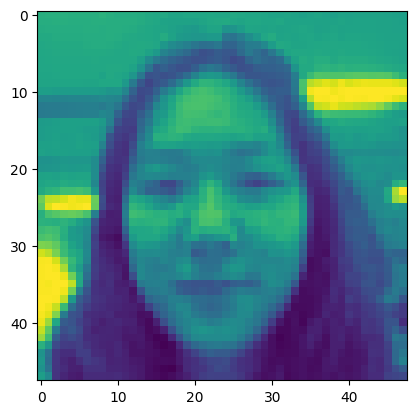

In [240]:
from PIL import Image
im2 = Image.open("shera.jpg", "r")
pix_val = list(im2.getdata())
imageArray = np.reshape(pix_val,(48,48))
print(prediction(imageArray))
plt.imshow(imageArray)
plt.show()
